<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ceros_funciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Codigo Markdown:
Los numeras a, b, c y d tiene que ver con escritura en código Markdown y comandos de latex: 

a. Escriba en pseudocódigo los pasos para aplicar el método de la bisección.

b. Realice la deducción del metodo de Newton-Rapshon, se recomienda escribir las ecuaciones en formato latex, para ello puede emplear las siguientes expresiones:

c. ¿Cuál es la diferencia del metodo de Newton-Rapson con respecto al de la secante?


d. Escriba en pseudocódigo los pasos para aplicar el método Punto Fijo.



Comentarios para escribir en latex

*   Entre simbolos \$ \$, puedes porner expresiones  puede poner expresiones, ejemplo:  $y = a_0 x^2 + b_1$  

*  Las funciones pueden ser definidas entre \\$,  poniendo un \\, antes de la funcion ejemplo: \\$ \\sinx \\$,   asi las funciones quedarian de esta manera : 

> $\sin x$, $\tan x$, $\sec x$, $\sqrt{a} $, $\frac{a}{b}, \frac{df}{dt}$

* Puedes generar tambien escribir ecuaciones con la instrucción:

  \\begin{equation} 

    \\sin x  
  
  \\end{equation}

Ejemplo:

  \begin{equation} 
    \frac{df}{dx} = \sin x  
  \end{equation}

a. Algoritmo de la bisección

```
input a,b,M,δ,ε
u ← f(a)
v ← f(b)
e ← b-a
output a,b,u,v
if signo(u) = signo(v) then stop
for k = 1,2,...,M do
    e ← e/2
    c ← a + e
    w ← f(c)
    output k,c,w,e
    if |e| < δ of |w|< ε then stop
    if signo(w) ≠ signo(u) then 
        b ← c
        v ← w
    else
        a ← c
        u ← w
    end if
end. 

```

b. Metodo de Newton-Rapshon

Sea $r$ un cero de la función $f$ y sea $x$ una aproximación a $r$. si $f''$ existe y es continua, por el teorema de Taylor sabemos que:
$$0 = f(r) = f(x+h)=f(x)+hf'(x) + O(h^2)$$
donde $h=r-x$. si $h$ es pequeña (es decir,$x$ es próximo a $r$), es razonable ignorar el término $O(h^2)$ y resolver el resto de la ecuación para $h$.
En consecuencia, el resultado es $h=-f(x)/f'(x)$. Si $x$ es próximo a $r,x-f(x)/f'(x)$ debería estar aún más próximo a $r$.El método de Newton comienza 
con una estimación $x_0$ de $r$ partir de la cual se define inductivamente una sucesión de aproximaciones 

 $$x_{n+1}=x_n - \frac{f(x_n)}{f'(x_n)} \quad (n \geq 0)$$

c.  Diferencia del metodo de Newton-Rapson con respecto al de la secante

El metodo de Newton-Rapson presenta una desventaja al utilizar la derivada de la función cuyo cero se busca.Para superar esta dificultad se propone el método de la secante. Su expresión es 

$$ x_{n+1} = x_n - f(x_n) \left[\frac{x_n-x_{n-1}}{f(x_n)-f(x_{n-1})} \right] \quad (n \geq 1) $$

Por tante, la diferencia es que el metodo de Newton-Rapson depende del calculo de la derivada de la función y el de la secante no.

d. Algoritmo del método Punto Fijo.

```
funcion punto_fijo(f, g, x0, criterio_parada):
    xn = x0
    i = 1
    mientras i <= criterio_parada:
        xn_anterior = xn
        xn = g(xn_anterior)
        error_relativo = abs(xn - xn_anterior) / abs(xn)
        si error_relativo < tolerancia:
            devolver xn
        i = i + 1
    devolver "No se encontró un punto fijo dentro del número máximo de iteraciones permitidas."
``` 

In [536]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

# 2. Ceros de funciones
*Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$ por diferentes metodos, bisection, newton-rapshon, punto fijo.

In [537]:
# Definimos la funcion 
def f(x):
    return np.cos(np.exp(x)-2)-(np.exp(x)-2)

# Definimos la derivada de la funcion
def df(x):
    return -np.sin(np.exp(x)-2)*(np.exp(x))-np.exp(x)

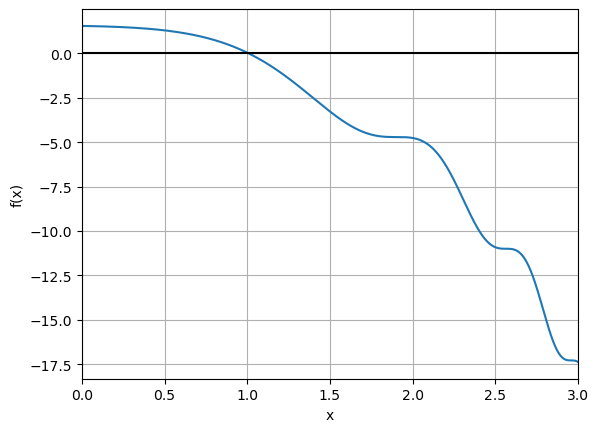

In [538]:
#@title Grafica de la funcion:
x = np.linspace(0, 3, 1000)
fig , ax = plt.subplots()
ax.plot(x, f(x))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.hlines(0, 0, 3, 'k')
ax.set_xlim(0, 3)
ax.grid()


Por metodo de la bisection:

In [539]:
#Calculamos la raiz con el metodo de biseccion, tomando como intervalo [0.5, 2]
rootb = optimize.bisect(f, 0.5, 2)
print('Raiz encontrada con el metodo de biseccion: {:.5f}'.format(rootb))

Raiz encontrada con el metodo de biseccion: 1.00762


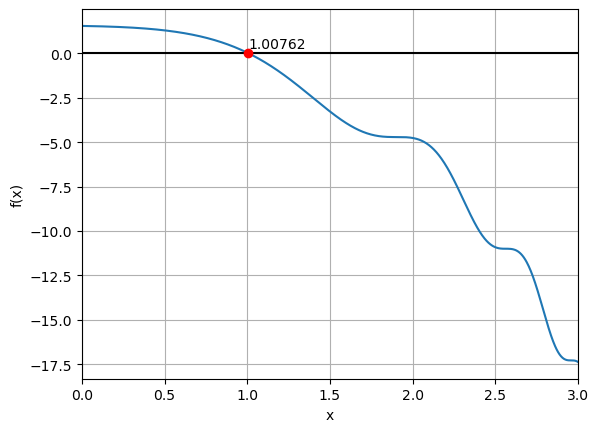

In [540]:
#@title Grafica de la funcion con la raiz encontrada con el metodo de biseccion:
x = np.linspace(0, 3, 1000)
fig , ax = plt.subplots()

ax.hlines(0, 0, 3, 'k')
ax.plot(x, f(x))
ax.plot(rootb, f(rootb), 'ro')
ax.set_xlabel('x')
ax.text(rootb, 0.3, '{:.5f}'.format(rootb))
ax.set_ylabel('f(x)')
ax.set_xlim(0, 3)
ax.grid()

Por metodo de Newton-rapshon:

In [541]:
#Calculamos la raiz con el metodo de Newton-Raphson, tomando como punto inicial x0 = 0.5 y la derivada de la funcion
rootn = optimize.newton(f,0.5,fprime = df)
print('Raiz encontrada con el metodo de Newton-Raphson: {:.5f}'.format(rootn))

Raiz encontrada con el metodo de Newton-Raphson: 1.00762


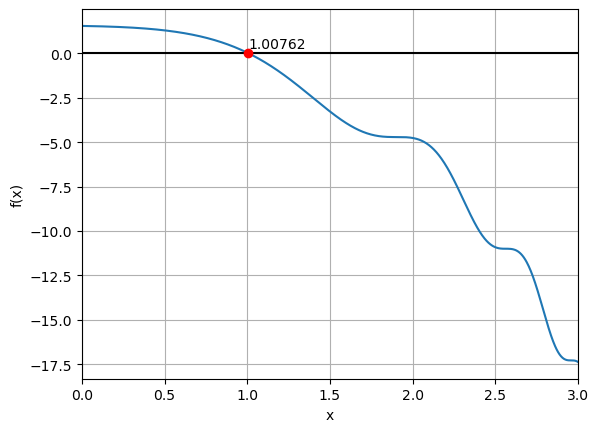

In [542]:
#@title Grafica de la funcion con la raiz encontrada con el metodo de Newton-Raphson:
x = np.linspace(0, 3, 1000)
fig , ax = plt.subplots()

ax.hlines(0, 0, 3, 'k')
ax.plot(x, f(x))
ax.plot(rootn, f(rootn), 'ro')
ax.set_xlabel('x')
ax.text(rootn, 0.3, '{:.5f}'.format(rootn))
ax.set_ylabel('f(x)')
ax.set_xlim(0, 3)
ax.grid()

Por metodo de punto fijo:

In [543]:
#Definimos una nueva funcion para el metodo de punto fijo
g = lambda x : x - f(x)

In [544]:
#Calculamos la raiz con el metodo de punto fijo, tomando como punto inicial x0 = 0.5
rootp = optimize.fixed_point(g ,1.5)
print('Raiz encontrada con el metodo de punto fijo: {:.5f}'.format(rootp))

Raiz encontrada con el metodo de punto fijo: 1.00762


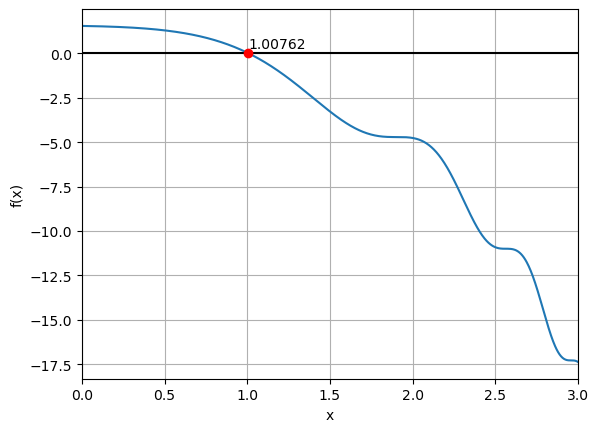

In [545]:
#@title Grafica de la funcion con la raiz encontrada con el metodo de punto fijo:
x = np.linspace(0, 3, 1000)
fig , ax = plt.subplots()
ax.hlines(0, 0, 3, 'k')
ax.plot(x, f(x))
ax.plot(rootp, f(rootp), 'ro')
ax.set_xlabel('x')
ax.text(rootp, 0.3, '{:.5f}'.format(rootp))
ax.set_ylabel('f(x)')
ax.set_xlim(0, 3)
ax.grid()

## 3. Partícula en reposo

Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}-\sin\omega t\right) 
\end{equation}

Suponga que la particula se desplazo 0.51m en 1s. Encuentre, con exactitud de $10^{-5}$ la rapidez $\omega$ con que cambia $\theta$. Supoga $g=9.76$m/s

In [546]:
#Definiendo la funcion:

def h(w:float,t:float = 1.0,x :float = 0.51,g:float = 9.76)->float:
  return  2*x*w**2 + g*(np.sinh(w*t)-np.sin(w*t))

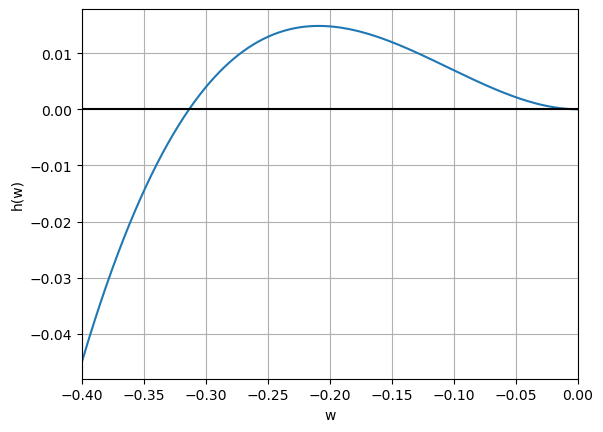

In [547]:
#Graficando la funcion:
# tomamos solo los valores w < 0, por tanto, ignoramos el cero que esta en el origen
w = np.linspace(-0.4,0,100000)

fig, ax = plt.subplots()
ax.plot(w,h(w))
ax.hlines(0,-0.4,0,'k')
ax.set_xlabel('w')
ax.set_ylabel('h(w)')
ax.set_xlim(-0.4,0)
ax.grid()


In [548]:
#Utilizamos el metodo de biseccion para encontrar la raiz de la funcion h(w) en el intervalo [-0.4,-0.2]
root = optimize.bisect(h,-0.4,-0.2)
print('Valor de w que cumple la condicion: {:.5f}'.format(root))

Valor de w que cumple la condicion: -0.31352


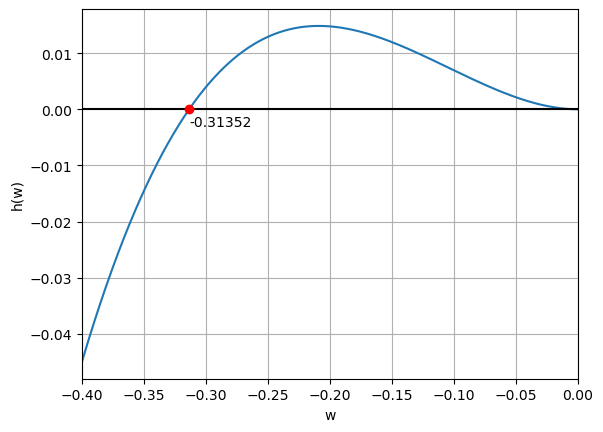

In [549]:
#@title Grafica de la funcion con la raiz encontrada con el metodo de biseccion:

fig, ax = plt.subplots()

ax.plot(w,h(w))
ax.hlines(0,-0.4,0,'k')
ax.plot(root,h(root),'ro')
ax.set_xlabel('w')
ax.set_ylabel('h(w)')
ax.set_xlim(-0.4,0)
ax.text(root,-0.003,'{:.5f}'.format(root))
ax.grid()

## 3.  Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)


Área del círculo: $A_c = \pi r^2$ ;
área del segmento circular: $A = \frac{1}{2} r^2(\theta - \sin\theta)$

Luego 

\begin{gather*}

  A&=\frac{1}{4}A_c \\ 
  \frac{1}{2}r^2(\theta-\sin\theta)&=\frac{1}{4} \pi r^2 \\
  -\frac{\pi}{2}+\theta-\sin(\theta)&= 0 
  
\end{gather*}

Entonces $f(\theta) = -\frac{\pi}{2}+\theta-\sin(\theta) $

In [550]:
#Definimos la funcion y su derivada:
def f(x):
  return -(np.pi/2) + x - np.sin(x)

def df(x):
  return 1 - np.cos(x)

In [551]:
#Funcion para el metodo de punto fijo:
def g(x):
  return (np.pi/2) + np.sin(x)

In [552]:
X = np.linspace(-2*np.pi, 2*np.pi, 1000)

dataf = pd.DataFrame({'theta'   : X,
                   'F_theta' : f(X) })

dataf.head(10)

,theta,F_theta
0,-6.283185,-7.853982
1,-6.270606,-7.853981
2,-6.258027,-7.853979
3,-6.245448,-7.853973
4,-6.232870,-7.853960
5,-6.220291,-7.853940
6,-6.207712,-7.853910
7,-6.195133,-7.853868
8,-6.182554,-7.853812
9,-6.169975,-7.853740


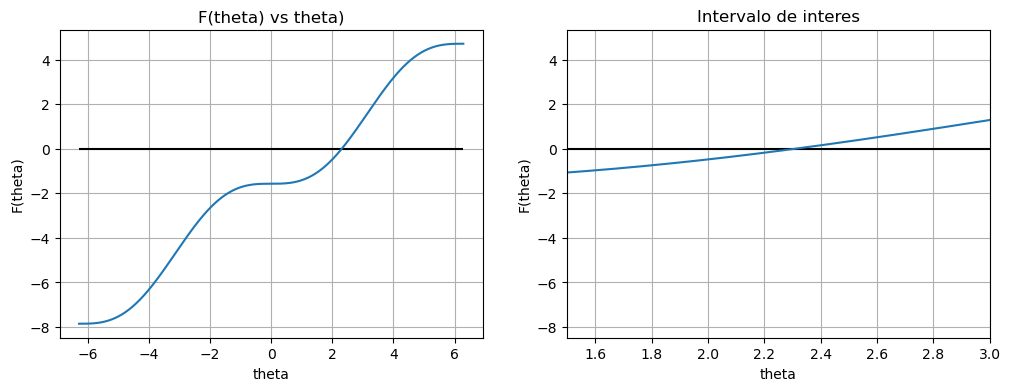

In [553]:
#@title Graficando de F(theta) vs theta:
fig , ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hlines(0,-2*np.pi, 2*np.pi, 'k')
ax[0].plot(dataf['theta'], dataf['F_theta'])
ax[0].set_xlabel('theta')
ax[0].set_ylabel('F(theta)')
ax[0].set_title('F(theta) vs theta)')
ax[0].grid()

ax[1].hlines(0,-2*np.pi, 2*np.pi, 'k')
ax[1].plot(dataf['theta'], dataf['F_theta'])
ax[1].set_xlabel('theta')
ax[1].set_title('Intervalo de interes')
ax[1].set_ylabel('F(theta)')
ax[1].set_xlim(1.5,3)
ax[1].grid()

In [554]:
#Metodo de la bisección
rootb = optimize.bisect(f, 0,4)
print('Valor del angulo con el metodo de biseccion: {:.5f}'.format(rootb))

#Metodo de Newton-Rapshon
rootn = optimize.newton(f, 2.5, fprime = df)
print('Valor del angulo con el metodo de Newton-Rapshon: {:.5f}'.format(rootn))

#Metodo de la secante
roots = optimize.newton(f,2)
print('Valor del angulo con el metodo de la secante: {:.5f}'.format(roots))

#fixed_point
rootfp = optimize.fixed_point(g, 2.4)
print('Valor del angulo con el metodo de punto fijo: {:.5f}'.format(rootfp))

Valor del angulo con el metodo de biseccion: 2.30988
Valor del angulo con el metodo de Newton-Rapshon: 2.30988
Valor del angulo con el metodo de la secante: 2.30988
Valor del angulo con el metodo de punto fijo: 2.30988


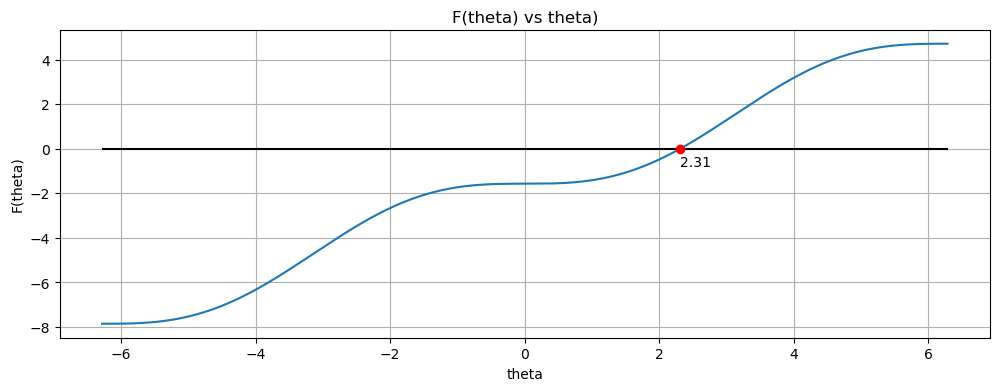

In [555]:
#Grafica de la funcion con la raiz encontrada:
fig , ax = plt.subplots(figsize=(12,4))
ax.hlines(0,-2*np.pi, 2*np.pi, 'k')
ax.plot(dataf['theta'], dataf['F_theta'])
ax.plot(rootb, f(rootb), 'ro')
ax.text(rootb, f(rootb) - 0.8 , '{:.2f}'.format(rootb))
ax.set_xlabel('theta')
ax.set_ylabel('F(theta)')
ax.set_title('F(theta) vs theta)')
ax.grid()




# 3. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si u es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.


In [556]:
# Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (theta, alpha, v0, b, u,g)  #Parametros en tupla.

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}


In [557]:
# Posicion en x
def pos_x(t:float, theta:float, alpha:float, v0:float, b:float, u:float,g:float)-> float:
  return (u*np.cos(alpha))*t + ((v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp(-b*t)))/b 

# Posicion en y
def pos_y(t:float, theta:float, alpha:float, v0:float, b:float, u:float,g:float) -> float:
  return ((g/b + v0*np.sin(theta)-u*np.sin(alpha))*(1-np.exp(-b*t)))/b - (g/b - u*np.sin(alpha))*t

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

In [558]:
t = np.linspace(0,45,1000)

dicc = {'X'     : pos_x(t,*Params),
        'Y'     : pos_y(t,*Params),
        'Tiempo': t}

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.


In [559]:
df = pd.DataFrame.from_dict(dicc)
df.head()

,X,Y,Tiempo
0,0.000000,0.000000,0.000000
1,1.907428,1.899014,0.045045
2,3.807525,3.773893,0.090090
3,5.700307,5.624692,0.135135
4,7.585791,7.451465,0.180180


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).

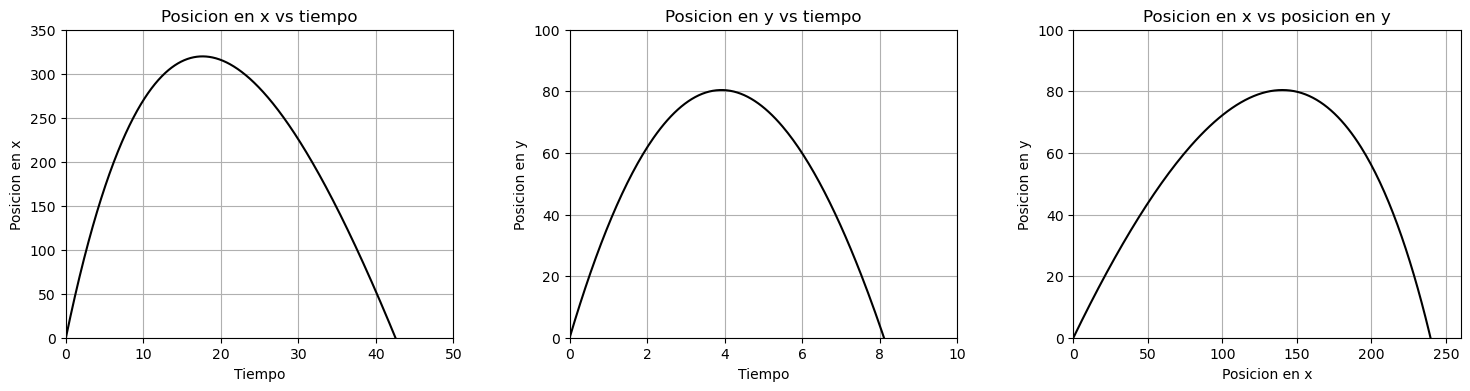

In [560]:
fig , axs = plt.subplots(1,3,figsize=(18,4))
ax= axs.flatten()

ax[0].plot(df['Tiempo'], df['X'],'k')
ax[0].set_title('Posicion en x vs tiempo')
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Posicion en x')
ax[0].set_ylim(0,350)
ax[0].set_xlim(0,50)
ax[0].grid()

ax[1].plot(df['Tiempo'], df['Y'],'k')
ax[1].set_title('Posicion en y vs tiempo')
ax[1].set_xlabel('Tiempo')
ax[1].set_ylabel('Posicion en y')
ax[1].set_ylim(0,100)
ax[1].set_xlim(0,10)
ax[1].grid()
 
ax[2].plot(df['X'],df['Y'],'k')
ax[2].set_title('Posicion en x vs posicion en y')
ax[2].set_xlabel('Posicion en x')
ax[2].set_ylabel('Posicion en y')
ax[2].set_ylim(0,100)
ax[2].set_xlim(0,260)
ax[2].grid()

fig.subplots_adjust(wspace=0.3)


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

In [561]:
#Utilizando el metodo de biseccion para encontrar la raiz de la funcion pos_y
root = optimize.bisect(pos_y,8,9,Params)
root

8.11162702209731

In [562]:
#Reemplazando la raiz en la funcion pos_x
pos_x(root,*Params)

print('El alcance maximo de la partícula es: {:.2f} m'.format(pos_x(root,*Params)))

El alcance maximo de la partícula es: 239.61 m


6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.

In [563]:
# Parametros iniciales

v0 = 60              #Velocidad en m/s
alpha = np.pi        #Angulo del viento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8              #Aceleracion de la gravedad m/s2

params2 = (alpha, v0, b, u,g)  #Parametros en tupla.

# Diccionario de datos de alcance maximo y angulo de lanzamiento

alcance_max = []
for i in range(10,85,5):
  root = optimize.bisect(pos_y,1,90,(np.deg2rad(i),*params2))
  alcance_max.append(pos_x(root,np.deg2rad(i),*params2))


df = pd.DataFrame({'Alcance maximo' : alcance_max,'theta' : [i for i in range(10,85,5)]})
df

,Alcance maximo,theta
0,114.092050,10
1,159.114248,15
2,195.251607,20
3,222.192572,25
4,239.866010,30
5,248.413854,35
6,248.164280,40
7,239.606149,45
8,223.365113,50
9,200.181558,55


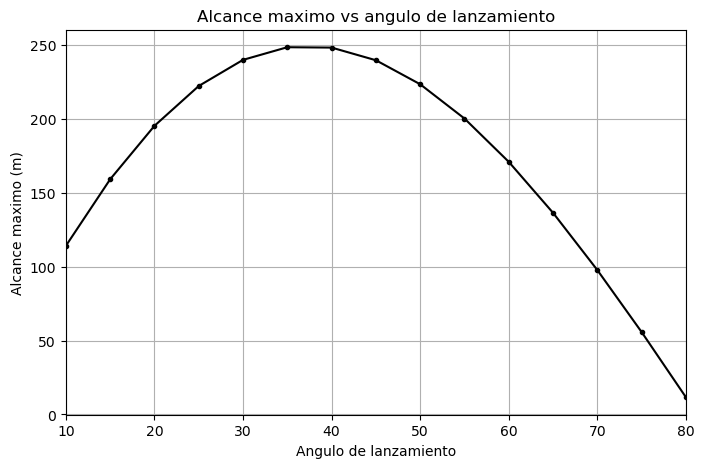

In [564]:
#Grafica de alcance maximo vs angulo de lanzamiento

fig , ax = plt.subplots(figsize=(8,5))
ax.plot(df['theta'], df['Alcance maximo'],'k.-')
ax.set_title('Alcance maximo vs angulo de lanzamiento')
ax.set_xlim(10,80)
ax.set_xlabel('Angulo de lanzamiento')
ax.set_ylabel('Alcance maximo (m)')
ax.grid()


# 4. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

```
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break           
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16      
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```

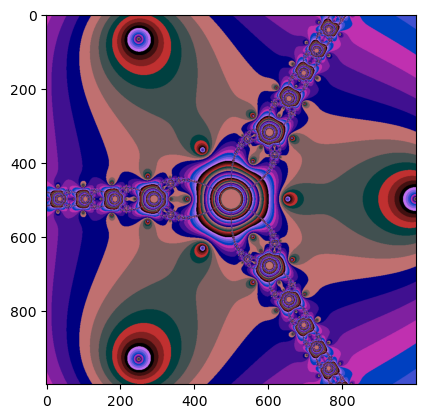

In [565]:
#@title Fractal
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 1000 #Numero de pixeles en x
Npx_Y = 1000 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break           
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16      
      image.putpixel((x,y), (r,g,b))

plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)